# 훈련 세트와 테스트 세트

## 리스트

In [77]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8,
               8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 학습 데이터 생성 (feature, label)
fish_data = [[l,w] for l,w in zip (fish_length, fish_weight)]

# k-최근접 이웃 알고리즘(지도학습)을 사용하기 위해 타겟 데이터 생성
# 지도학습은 모델을 훈련한 다음 새로운 데이터를 예측하는 데 활용
fish_target = [1] * 35 + [0] * 14 

print(len(fish_data))


49


In [78]:
# 인덱스 슬라이싱을 이용해 train, test 데이터셋 분리 (train: 도미, test: 빙어)
# 데이터 분리하는 이유 : 모델이 학습 데이터에 과적합(overfitting)되어 학습 데이터에만 잘 작동하고 새로운 데이터에는 잘 작동하지 않는 것을 방지

# 훈련 데이터셋 (도미)
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 데이터셋 (빙어) / 보통 전체 데이터의 20~30% 정도를 테스트셋으로 사용
test_input = fish_data[35:]
test_target = fish_target[35:]

# 문제점 - 비율과 무작위성 (특정 순서로 데이터가 정렬되어 있을 경우, 모델이 편향될 수 있다.)
# 결론적으로 도미만으로 학습하고 빙어만으로 테스트한다면, 모델은 빙어를 잘 구분하지 못할 수 있음 (과적합)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 생성 및 학습
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)

# 모델 정확도
kn.score(test_input, test_target)

# 도미로만 학습한 데이터로 빙어를 테스트했기 때문에 0점 (모델이 테스트 데이터셋를 0% 예측함)


0.0

## 넘파이

In [80]:
import numpy as np

# 리스트를 numpy 배열로 변환
# 2차원 배열 (49개의 샘플이 있고 각 샘플은 2개의 특성)
input_arr = np.array(fish_data)
# 1차원 배열 (정답을 0과 1로 이진 표현함)
target_arr = np.array(fish_target)

print(input_arr[:10], '\n', target_arr[:10], '\n')

# 두 데이터의 shape 출력
print(input_arr.shape, target_arr.shape)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]
 [ 30.  450. ]
 [ 30.7 500. ]] 
 [1 1 1 1 1 1 1 1 1 1] 

(49, 2) (49,)


In [81]:
import random
# 특정 시작 숫자값을 정해주면 난수처럼 보이는 수열을 생성, 그 특정 시작 숫자가 바로 시드(seed)
np.random.seed(42)  # 시드는 42로 고정 (모델 학습시마다 동일한 결과를 얻음)
index = np.arange(49)  # 인덱스 리스트 생성: [0, 1, ..., 48]

# 리스트 셔플
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [82]:
# index 리스트를 이용해 train/test 데이터 분리

# 셔플된 인덱스를 사용하여 데이터 재정렬
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(train_input[:10],"\n","\n", test_input)

[[ 32.  340. ]
 [ 12.4  13.4]
 [ 14.3  19.7]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 36.  714. ]
 [ 35.  720. ]
 [ 35.  725. ]
 [ 38.5 955. ]
 [ 33.5 650. ]] 
 
 [[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]


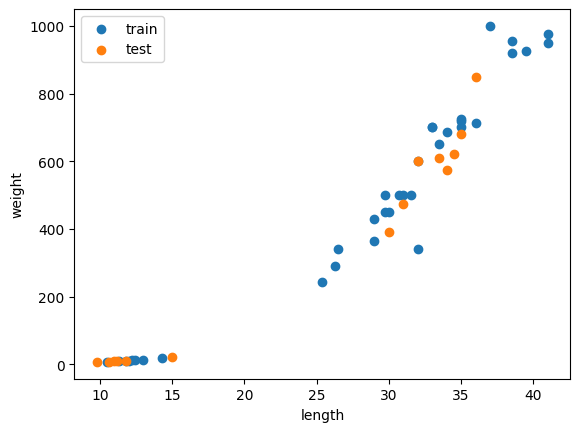

In [83]:
import matplotlib.pyplot as plt

# train/test 데이터의 분포 시각화
plt.scatter(train_input[:, 0], train_input[:, 1], label='train')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [84]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

# 14개의 테스트 데이터셋에 대해 모델이 전부 예측을 성공함 (1.0)

1.0

In [85]:
print(kn.predict(test_input))
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# 데이터 전처리

## 넘파이 데이터 준비

In [86]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
               31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
               35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
               7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# length, weight 데이터 결합
fish_data = np.column_stack((fish_length, fish_weight))
# target 리스트 생성: (1, 35) + (1, 14) -> (1, 49)
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_data[:5],"\n\n",fish_target[:5])



[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]] 

 [1. 1. 1. 1. 1.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [87]:
from sklearn.model_selection import train_test_split
# split 함수는 데이터셋의 75%를 훈련 세트로, 25%를 테스트 세트로 분할
# train_test_split 함수에서 shuffle 은 True가 기본값 (난수)

# stratify로 train과 test의 클래스 분포를 원본 데이터의 분포와 비슷하게 조정
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
# 원본 데이터셋에서 도미와 빙어의 비율이 7:3임, test_target에서도 이 비율이 대략적으로 유지 (staratify = fish_target 으로 설정했기 때문에)
train_target.sum() / len(train_target)
print(test_target)




[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [88]:
# k-최근접 이웃 분류 모델 생성
kn = KNeighborsClassifier()
# 모델 학습. (이 특성은 도미인지 빙어인지)
kn.fit(train_input, train_target)
# 모델의 분류 정확도를 반환, 올바르게 예측된 데이터의 비율
kn.score(test_input, test_target)

1.0

## 수상한 도미 한마리

In [89]:
pred = np.array([[25, 150]]) # 도미 데이터 생성
print(kn.predict(pred))

# 0이 나온다. 왜 빙어로 분류 되었는가?? 시각화를 해보자

[0.]


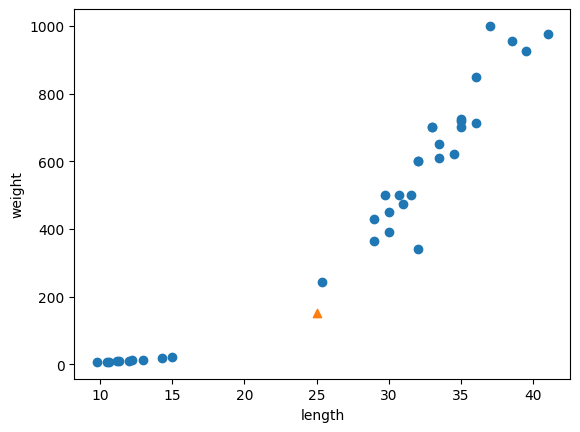

In [90]:
# train 데이터와 pred 데이터 시각화
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(pred[:, 0], pred[:, 1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


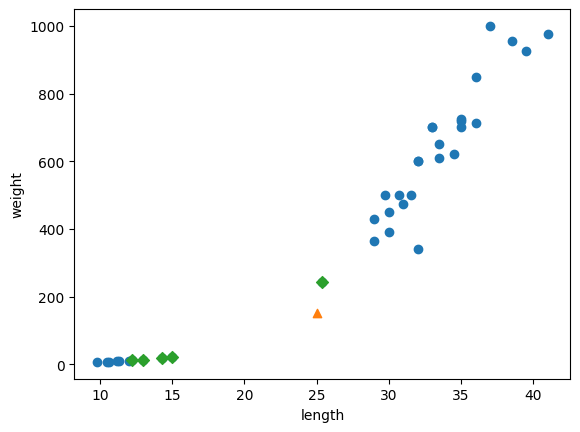

In [91]:
# pred와 주변 데이터 간의 distance 계산 후 이웃 살펴보기 (기본값 5개)
# kneighbors() 함수 사용
distances, indexes = kn.kneighbors(pred)
print(distances)


plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(pred[:, 0], pred[:, 1], marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [92]:
# 이웃에 빙어가 더 많기 때문에 예측을 시도한 도미 데이터가 빙어로 분류되어버림
# 따라서 Feature를 표준화 시킬 필요가 있다.

print(train_input[indexes])
print(train_target[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]


## 데이터 표준화(Standardization)

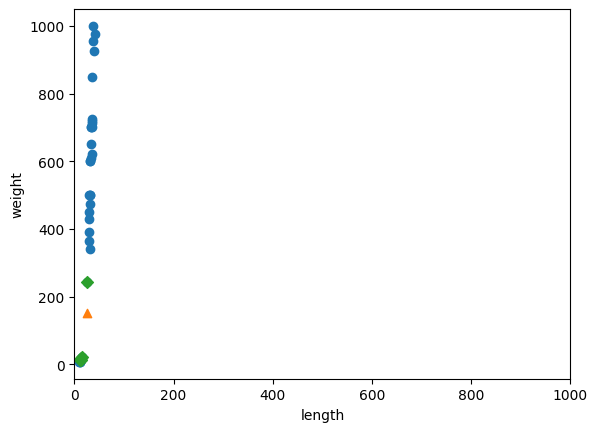

In [93]:
# x축 범위를 y축과 동일하게 표현 하면? 
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(pred[:, 0], pred[:, 1], marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
# x축의 스케일 조정 (0 ~ 1000)
plt.xlim(0, 1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 두 특성의 값의 범위가 매우 다른 경우를 두 특성의 스케일(scale)이 다르다고 한다.
# x축의 범위가 좁고 y축은 범위가 넓기 때문에 y축으로 조금만 멀어져도 실제 거리는 아주 크게 증가
# 따라서 length 특성이 이웃의 거리를 측정할 때 아주 적은 영향을 미쳐 편향이 생김 -> Standardization 필요


In [94]:
# 각 column별 mean, std 계산
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [95]:
# standardization 진행 -> mean = 0, variance = 1
# train_input은 2차원 배열

train_scaled = (train_input - mean) / std
print(train_scaled.mean(), train_scaled.std())

1.603655480014115e-16 1.0


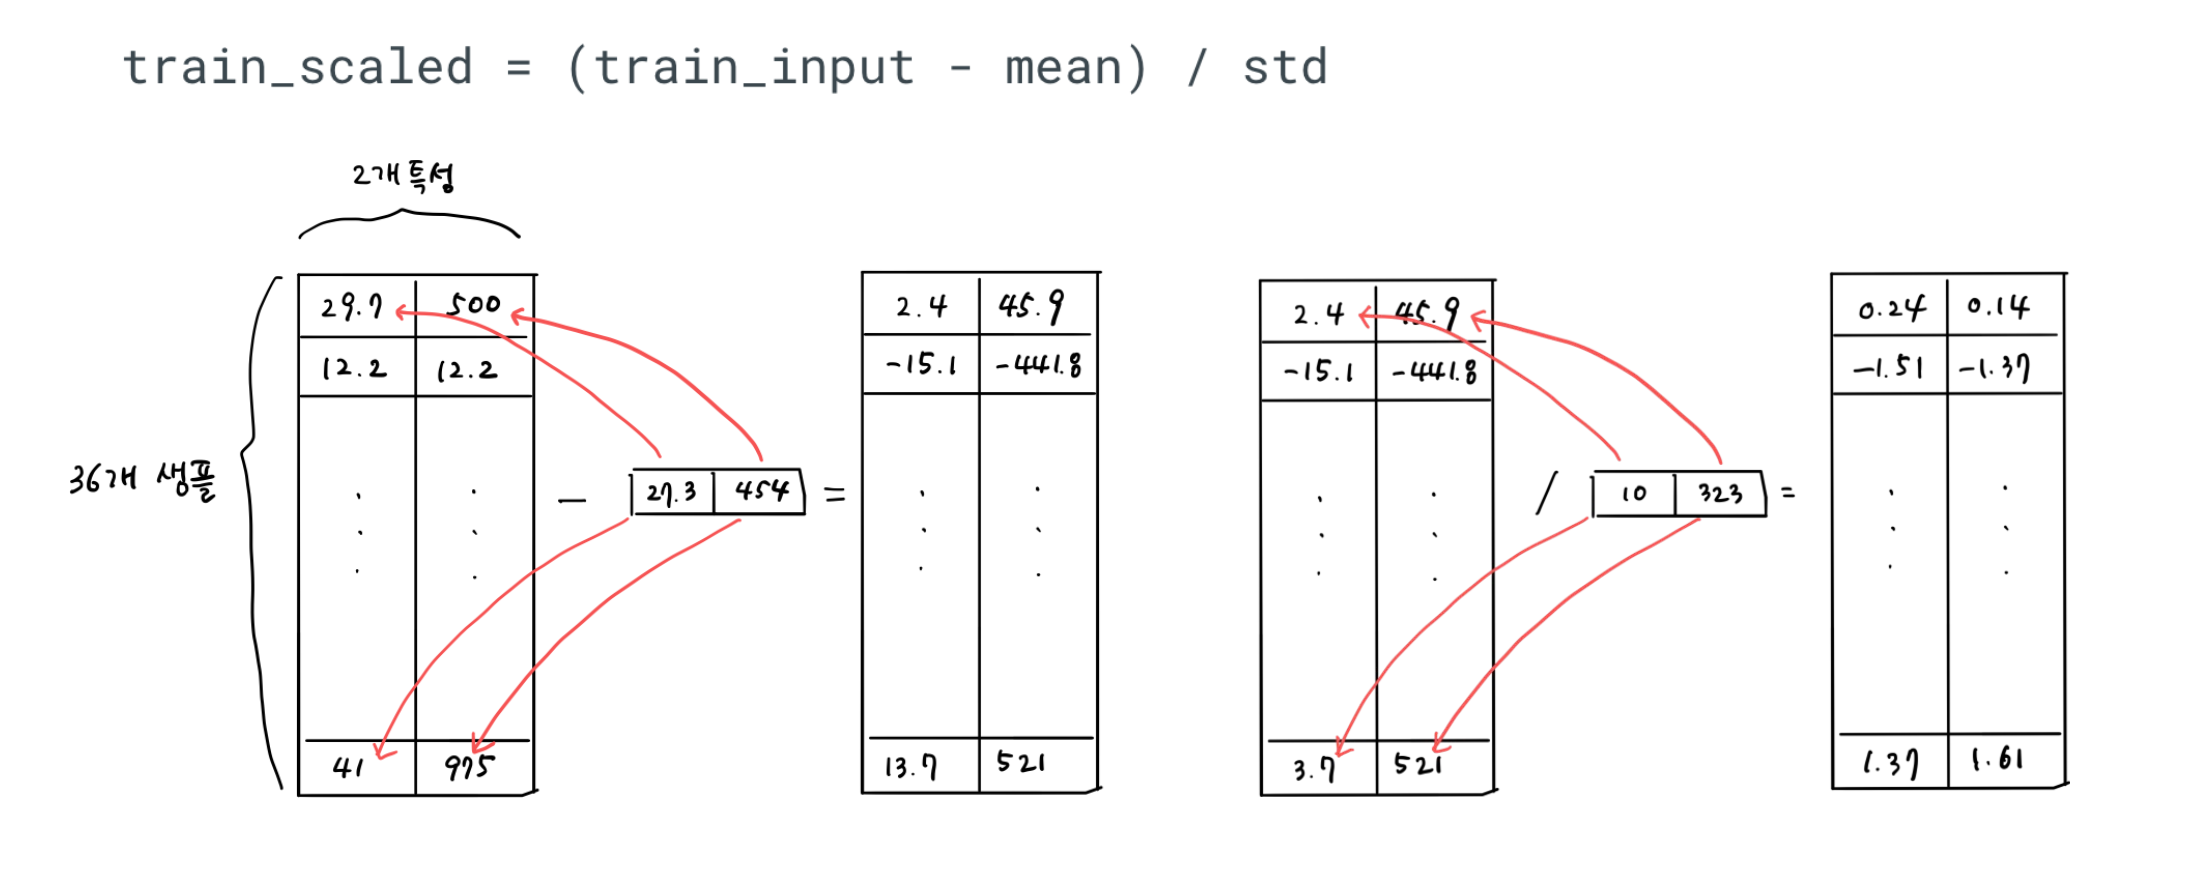

## 전처리 데이터로 모델 훈련하기

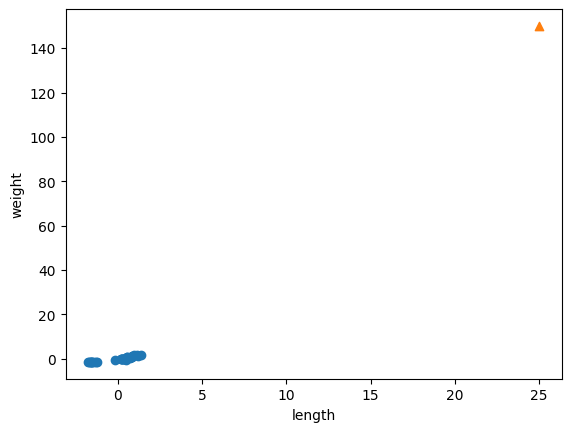

In [96]:
# train(표준화 O), pred(표준화 X) 간의  시각화
# 새로 예측할 도미 데이터는 아직 표준화 전이기 때문에 매우 외딴 곳에 위치됨..
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(pred[:, 0], pred[:, 1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[-0.23012627 -0.94060693]


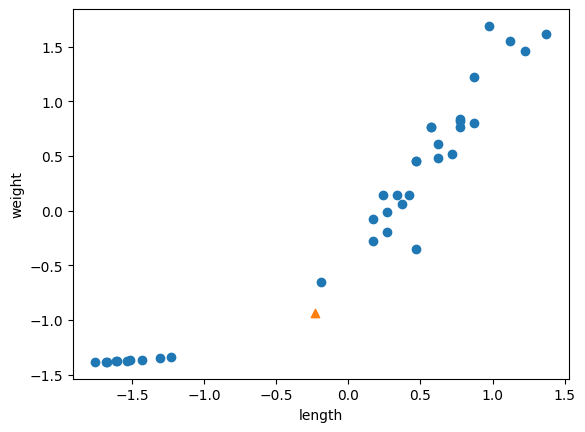

In [97]:
# 예측할 pred 데이터 표준화 진행
new = ([25, 150] - mean) / std
print(new)
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [98]:
# 모델 훈련
kn.fit(train_scaled, train_target)

# test 데이터 표준화
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [99]:
print(kn.predict([new]))

[1.]


In [100]:
# new와 주변 데이터 간의 distance 계산
distances, indexes = kn.kneighbors([new])

print(distances)

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]


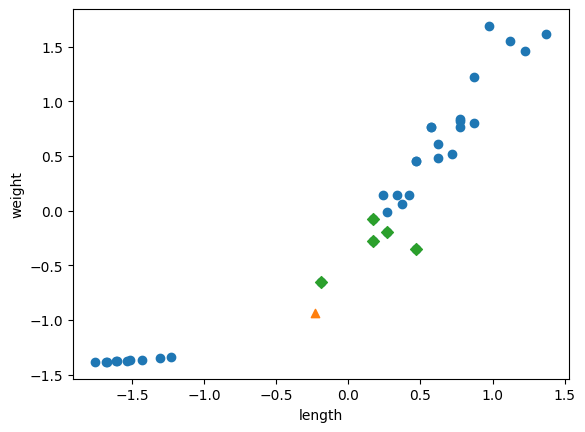

In [101]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()